In [1]:
import pandas as pd
import numpy as np
from function import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import PathPatch

/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
n = 10000

eps = 0 # np.random.normal(0, 0.1, n)

a = 2
b = 2

b0=0.5
b1 = 0.5

sim = 10000

p = 0.7

In [3]:
#df   = pd.DataFrame(np.random.uniform(0,1,size=(n, 3)),columns=['X1','X2','X3'])
#df.to_csv('data_sim.csv')  
df = pd.read_csv('data_sim.csv')
df.drop(df.columns[0],axis=1,inplace=True)

In [4]:
def higher_sobols(df,n1,sim,a,b,eps):
    singleton = []
    for x in [['X3'],['X1'],['X2'],[]]:
        singleton.append(sobol(df,n1,x,sim,a,b,eps))
    return pd.DataFrame(dict(zip(['X1_X2','X2_X3','X1_X3'],singleton)))

In [5]:
def higher_sobol(df,Xi,n,p,sample):
    omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= p),columns=[Xi])
    omega[df.drop([Xi],axis=1).columns]=  np.ones((n,2),dtype=int)
    cc = df.where(omega==1,np.nan).dropna()
    print(len(cc))
    higher_sobol_cc = higher_sobols(cc,len(cc),sim,a,b,eps)
    #fig, ax = plt.subplots()
    #ax.boxplot(single_sobol_cc)
    #ax.set_xticklabels(single_sobol_cc.columns)
    higher_sobol_cc['sample'] = sample
    return higher_sobol_cc

In [6]:
higher_sobol(df,'X3',n,1,'complete')

10000


,X1_X2,X2_X3,X1_X3,sample
0,0.800287,0.663943,0.489106,complete
1,0.798310,0.668552,0.502563,complete
2,0.797656,0.662500,0.502285,complete
3,0.794576,0.660291,0.499688,complete
4,0.795330,0.676053,0.490845,complete
...,...,...,...,...
9995,0.802482,0.648991,0.497747,complete
9996,0.802116,0.662617,0.488102,complete
9997,0.800450,0.663486,0.490847,complete
9998,0.798430,0.669432,0.485544,complete


X1 is missing

0.4
10000
3940


<ipython-input-7-a786b849ab87>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X1 is missing

0.7
10000
7081


<ipython-input-7-a786b849ab87>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X1 is missing

0.9
10000
9017


<ipython-input-7-a786b849ab87>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X2 is missing

0.4
10000
3970


<ipython-input-7-a786b849ab87>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X2 is missing

0.7
10000
7082


<ipython-input-7-a786b849ab87>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X2 is missing

0.9
10000
9037


<ipython-input-7-a786b849ab87>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X3 is missing

0.4
10000
3978


<ipython-input-7-a786b849ab87>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X3 is missing

0.7
10000
7030


<ipython-input-7-a786b849ab87>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


X3 is missing

0.9
10000
8993


<ipython-input-7-a786b849ab87>:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'


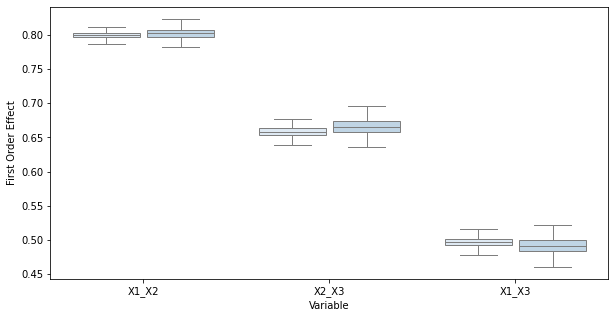

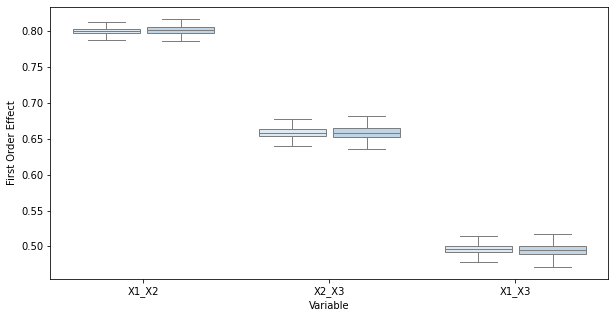

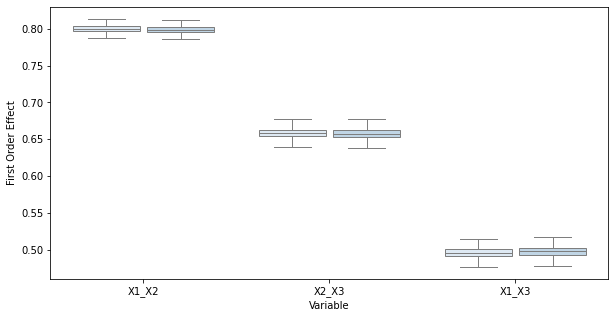

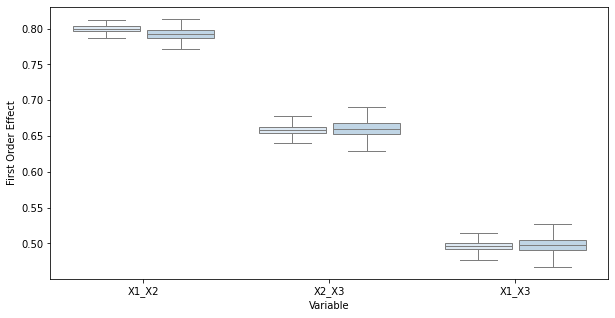

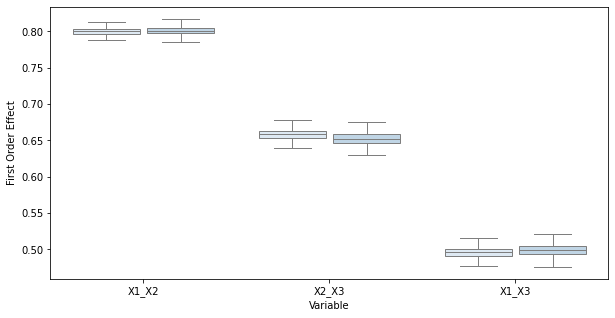

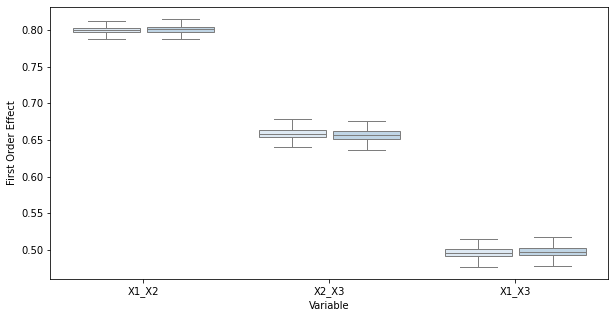

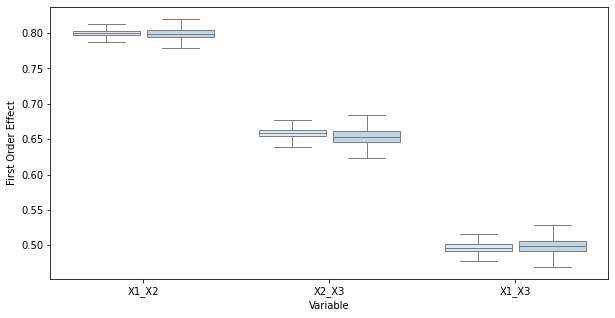

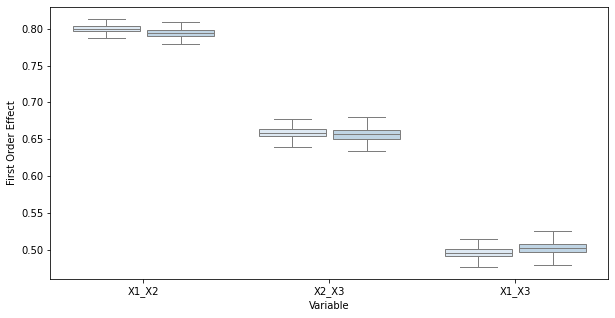

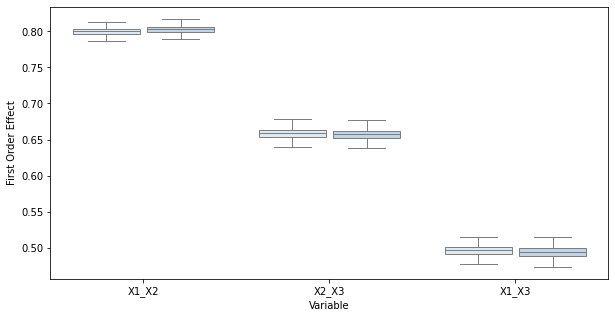

In [7]:
for x in ['X1','X2','X3']: #0.4,0.7,
    for p in [0.4,0.7,0.9]:
        print(x+ ' is missing')
        print()
        print(p)
        single_sobol = higher_sobol(df,x,n,1,'complete')
        single_sobol_cc = higher_sobol(df,x,n,p,'cc')

    
  
        cdf = pd.concat([single_sobol, single_sobol_cc],axis=0)  
    
        dd = pd.melt(cdf, id_vars= ['sample'],value_vars=['X1_X2','X2_X3','X1_X3'],var_name='Variable')
        dd = dd.rename(columns={'value':'First Order Effect'})
        
        dd.to_csv(f'simulation/mcar_run/mcar_mix/{x}_mcar_{p}.csv')
 
        fig, ax = plt.subplots(1, 1,figsize=(10, 5))
    
        ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('Blues'),showfliers = False) #"Blues" "cubehelix" flare_r'
        ax.legend_.remove()
        #ax.set(ylim=(0, 0.6))
        fig = ax.get_figure()
        adjust_box_widths(fig, 0.9)
        fig.savefig('simulation/mcar/mcar_mix/MCAR_'+str(x)+'_'+str(p)+'.pdf',transparent=True,bbox_inches='tight')


In [8]:
dX14 = pd.read_csv(f'simulation/mcar_run/mcar_mix/{x}_mcar_0.4.csv')

30000
30000


<ipython-input-20-920ac900eeb9>:19: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dp,hue='prob',palette=sns.color_palette('Blues_r'),showfliers = False,hue_order=[1,0.9,0.7,0.4]) #"Blues" "cubehelix" flare_r'


30000
30000


<ipython-input-20-920ac900eeb9>:19: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dp,hue='prob',palette=sns.color_palette('Blues_r'),showfliers = False,hue_order=[1,0.9,0.7,0.4]) #"Blues" "cubehelix" flare_r'


30000
30000


<ipython-input-20-920ac900eeb9>:19: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dp,hue='prob',palette=sns.color_palette('Blues_r'),showfliers = False,hue_order=[1,0.9,0.7,0.4]) #"Blues" "cubehelix" flare_r'


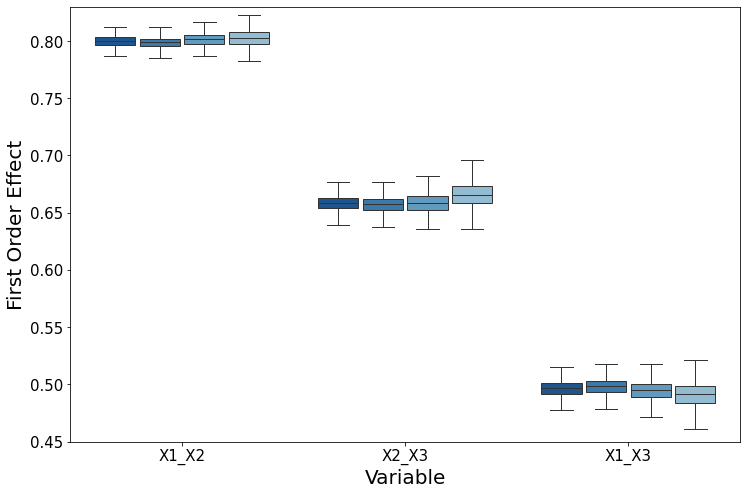

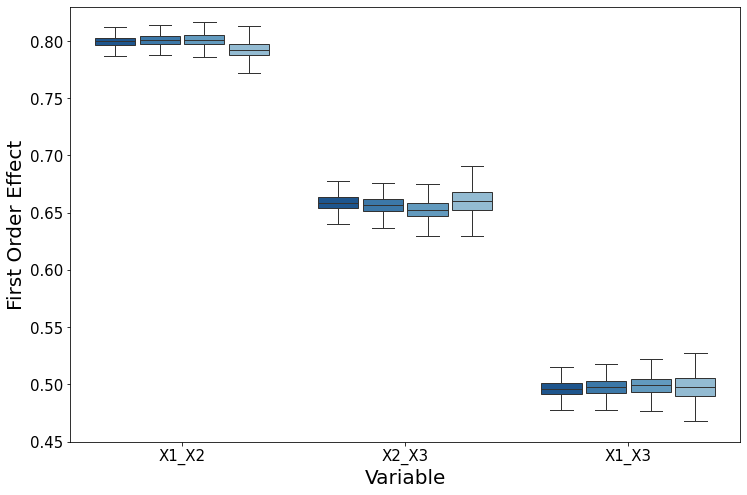

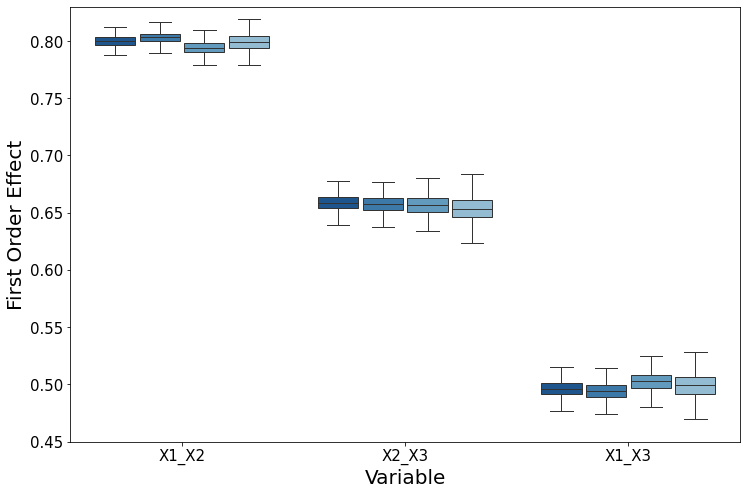

In [20]:
for x in ['X1','X2','X3']:
    dX14 = pd.read_csv(f'simulation/mcar_run/mcar_mix/{x}_mcar_0.4.csv')
    dX14['prob'] =  dX14['sample'].apply(lambda x: 1 if x =='complete' else 0.4)

    dX16 = pd.read_csv(f'simulation/mcar_run//mcar_mix/{x}_mcar_0.7.csv')
    dX16 = dX16.loc[(dX16['sample']=='cc')]
    dX16['prob'] = 0.7
    print(len(dX16))

    dX19 = pd.read_csv(f'simulation/mcar_run/mcar_mix/{x}_mcar_0.9.csv')
    dX19 = dX19.loc[(dX19['sample']=='cc')]
    dX19['prob'] = 0.9
    print(len(dX19))

    dp = pd.concat([dX14,dX16,dX19],axis=0,ignore_index=False)
    
    fig, ax = plt.subplots(1, 1,figsize=(12, 8))
    
    ax = sns.boxplot(x='Variable',y='First Order Effect',data=dp,hue='prob',palette=sns.color_palette('Blues_r'),showfliers = False,hue_order=[1,0.9,0.7,0.4]) #"Blues" "cubehelix" flare_r'
    ax.legend_.remove()
    ax.set(ylim=(0.45, 0.83))
    fig = ax.get_figure()
    adjust_box_widths(fig, 0.9)
    plt.xticks(fontsize = 15) 
    plt.yticks(fontsize = 15) 
    ax.set_xlabel('Variable', fontsize = 20) 
    ax.set_ylabel('First Order Effect', fontsize = 20) 
    fig.savefig(f'simulation/mcar/mcar_mix/{x}_MCAR_p_mix.pdf',transparent=True,bbox_inches='tight')